[1] "X"      "t"      "localA" "localB"
[1] "N = 260"


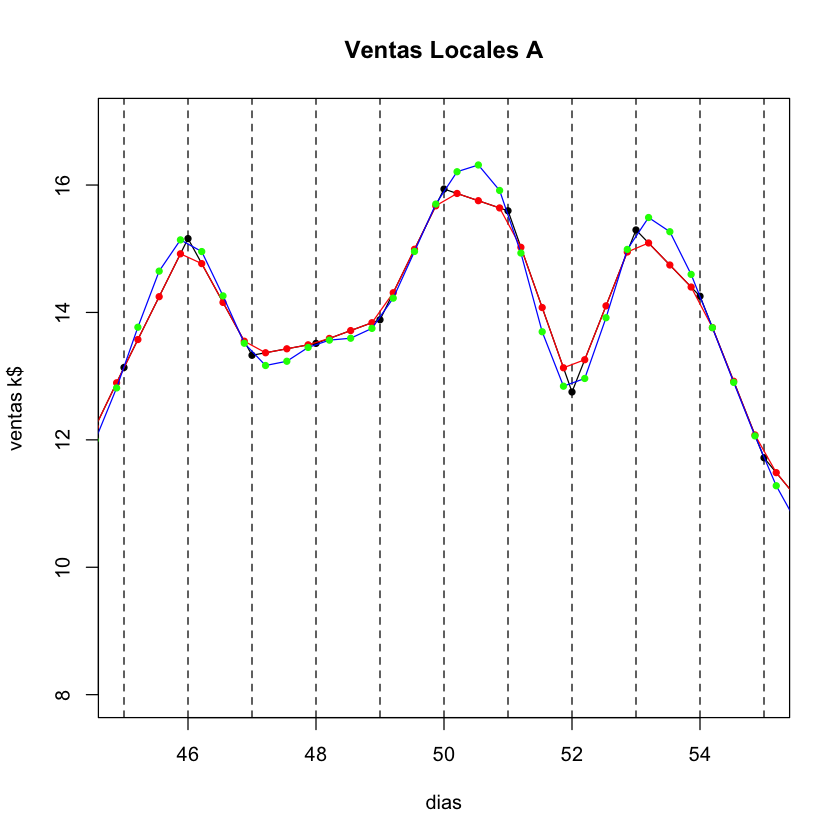

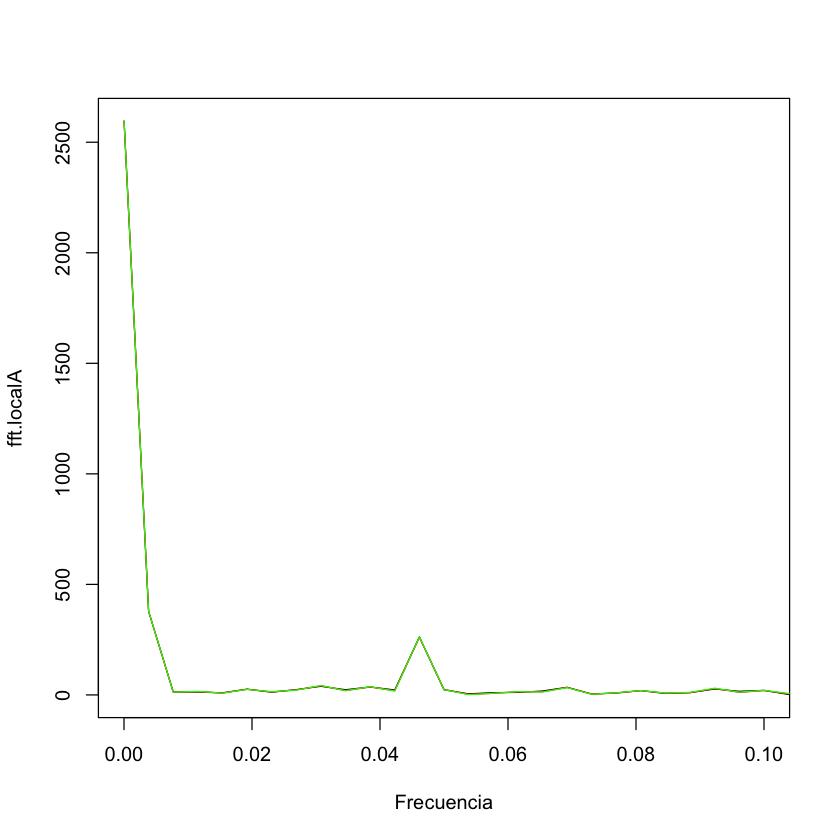

In [4]:
# Caso 1: Aumentar la frecuencia de muestreo
dir = '/Users/marcelorisk/Dropbox/Series_Temporales_2022/'
dos.locales = read.csv(paste( dir, 'DosLocales.csv',sep=''))
print(names(dos.locales))
# [1] "X" "t" "localA" "localB"

# aumentar la frecuencia de muestreo
N = length(dos.locales$localA)
print (paste('N =',N))
localAfal = approx(dos.locales$t, dos.locales$localA, n=3*N)
localAfas = spline(dos.locales$t, dos.locales$localA, n=3*N)

plot(dos.locales$t, dos.locales$localA, type='l', main='Ventas Locales A', xlab='dias', ylab='ventas k$',
     xlim=c(45,55),ylim=c(8,17))
points(dos.locales$t, dos.locales$localA, pch=20, col='black')

for(j in 1:N)
    {
    abline(v=j, lty =2)
    }
lines(localAfal$x, localAfal$y, col='red')
points(localAfal$x, localAfal$y, pch=20, col='red')
lines(localAfas$x, localAfas$y, col='blue')
points(localAfas$x, localAfas$y, pch=20, col='green')

fft.localA = Mod(fft(dos.locales$localA))
fft.localAfal = Mod(fft(localAfal$y))
fft.localAfas = Mod(fft(localAfas$y))

tiempo = 0:(N-1)
tiempo3 = 0:(3*N-1)

FrecuenciaMuestreo = 1
DeltaFrecMuestreo = FrecuenciaMuestreo/N

Frecuencia = DeltaFrecMuestreo*tiempo
FrecuenciaMuestreo = 3

DeltaFrecMuestreo = FrecuenciaMuestreo/(3*N)
FrecuenciaInterpolada = DeltaFrecMuestreo*tiempo3
plot(Frecuencia, fft.localA, type='l', xlim=c(0,0.1))
lines(FrecuenciaInterpolada, fft.localAfal/3, col='red')
lines(FrecuenciaInterpolada, fft.localAfas/3, col='green')

[1] "N = 260"


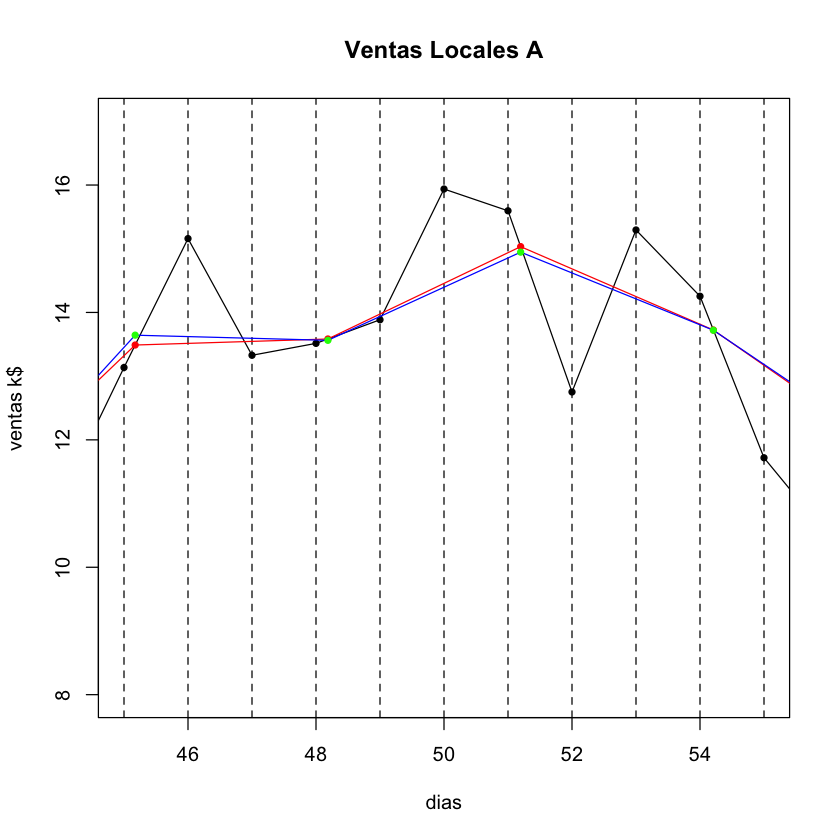

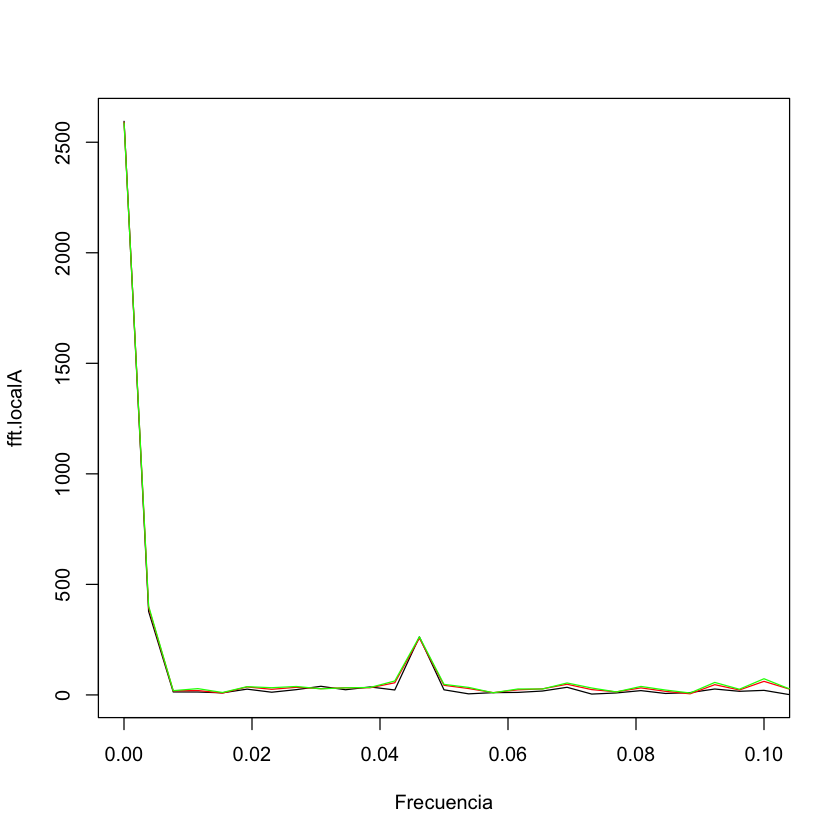

In [9]:
# Caso 2: Disminuir la frecuencia de muestreo
N = length(dos.locales$localA)
print(paste('N =',N))

localAfal = approx(dos.locales$t, dos.locales$localA, n=N/3)
localAfas = spline(dos.locales$t, dos.locales$localA, n=N/3)

plot(dos.locales$t, dos.locales$localA, type = 'l', main='Ventas Locales A', xlab='dias', ylab='ventas k$',
      xlim=c(45,55),ylim=c(8,17))
points(dos.locales$t, dos.locales$localA, pch=20, col='black')
for(j in 1:N)
    {
    abline (v=j, lty =2)
    }
lines(localAfal$x, localAfal$y, col='red')
points(localAfal$x, localAfal$y, pch=20, col='red')
lines(localAfas$x, localAfas$y, col='blue')
points(localAfas$x, localAfas$y, pch=20, col='green')

fft.localA = Mod(fft(dos.locales$localA))
fft.localAfal = Mod(fft(localAfal$y))
fft.localAfas = Mod(fft(localAfas$y))

tiempo = 0:(N-1)
tiempo3 = 0:(N/3)
FrecuenciaMuestreo = 1
DeltaFrecMuestreo = FrecuenciaMuestreo/N
Frecuencia = DeltaFrecMuestreo*tiempo
FrecuenciaMuestreo = 1/3
DeltaFrecMuestreo = FrecuenciaMuestreo/(N/3)
FrecuenciaInterpolada = DeltaFrecMuestreo*tiempo3

plot(Frecuencia, fft.localA, type='l', xlim=c(0,0.1))
lines(FrecuenciaInterpolada, 3*fft.localAfal, col='red')
lines(FrecuenciaInterpolada, 3*fft.localAfas, col='green')

[1] "N = 260"


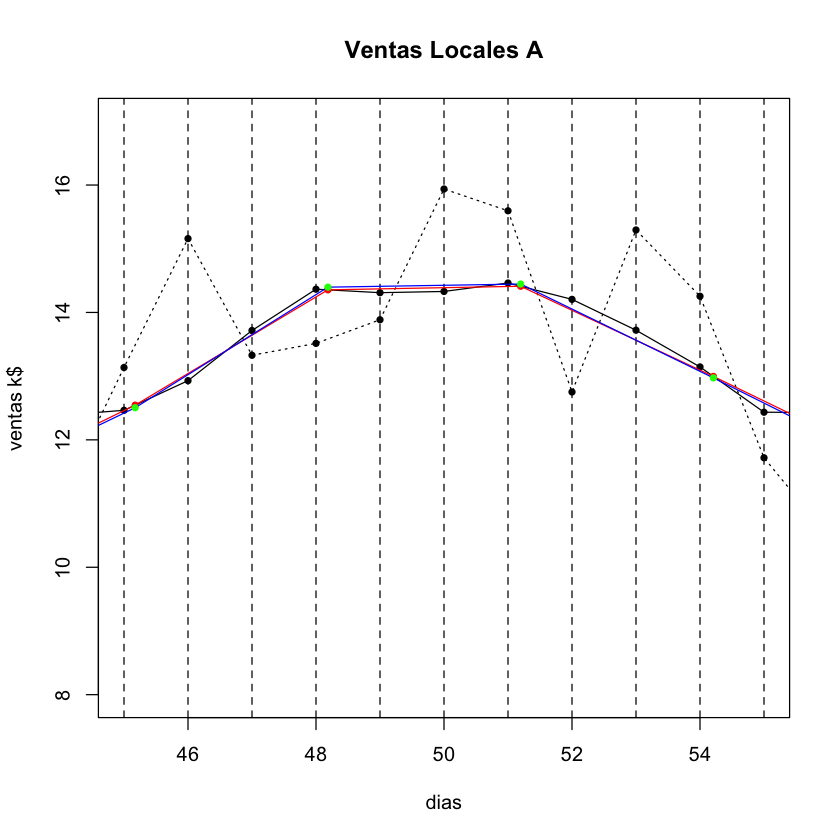

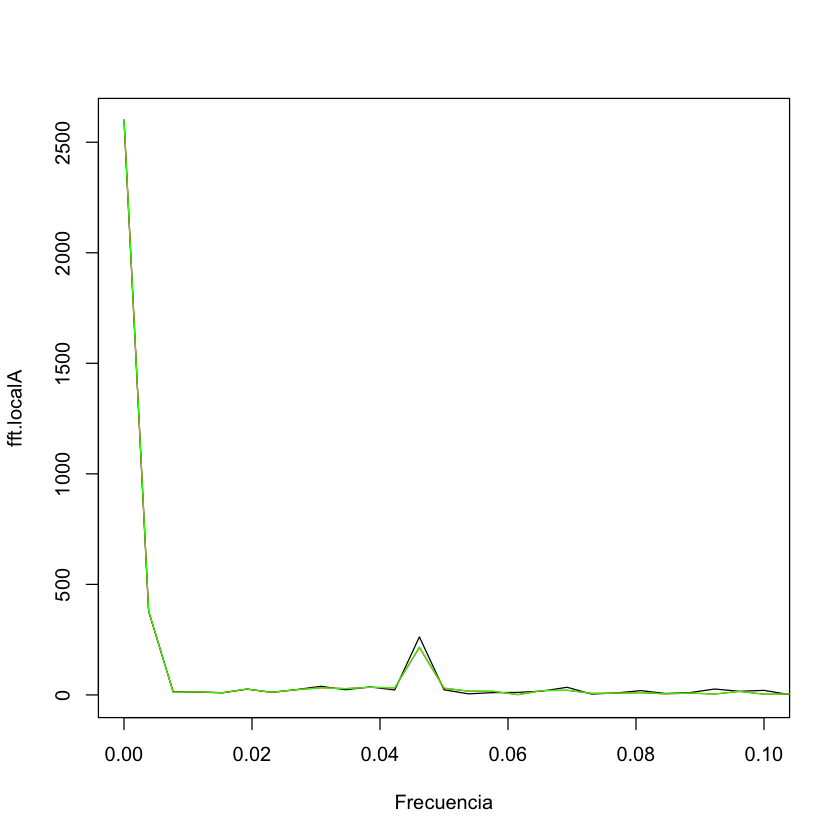

In [12]:
# Caso 2: Disminuir la frecuencia de muestreo, con filtrado PB
N = length(dos.locales$localA)
print(paste('N =',N))
localAma = filter(dos.locales$localA, rep(1/7,7), circular = TRUE)
localAfal = approx(dos.locales$t, localAma, n=N/3)
localAfas = spline(dos.locales$t, localAma, n=N/3)

plot(dos.locales$t, dos.locales$localA, type = 'l', main='Ventas Locales A', xlab='dias', ylab='ventas k$',
     xlim=c(45,55), ylim=c(8,17), lty =3)
points(dos.locales$t, dos.locales$localA, pch=20, col='black')
lines(dos.locales$t, localAma, type = 'l', main='Ventas Locales A', xlab='dias', ylab='ventas k$', xlim=c(45,55), ylim=c(8,17))
points(dos.locales$t,localAma, pch=20, col='black')
for(j in 1:N)
    {
    abline(v=j, lty =2)
    }
lines(localAfal$x, localAfal$y, col='red')
points(localAfal$x, localAfal$y, pch=20, col='red')
lines(localAfas$x, localAfas$y, col='blue')
points(localAfas$x, localAfas$y, pch=20, col='green')

fft.localA = Mod(fft(dos.locales$localA))
fft.localAfal = Mod(fft(localAfal$y))
fft.localAfas = Mod(fft(localAfas$y))

tiempo = 0:(N-1)
tiempo3 = 0:(N/3)
FrecuenciaMuestreo = 1
DeltaFrecMuestreo = FrecuenciaMuestreo/N
Frecuencia = DeltaFrecMuestreo*tiempo
FrecuenciaMuestreo = 1/3
DeltaFrecMuestreo = FrecuenciaMuestreo/(N/3)
FrecuenciaInterpolada = DeltaFrecMuestreo*tiempo3

plot(Frecuencia, fft.localA, type='l', xlim=c(0,0.1))
lines(FrecuenciaInterpolada, 3*fft.localAfal, col='red')
lines(FrecuenciaInterpolada, 3*fft.localAfas, col='green')

[1] "t"  "RR"


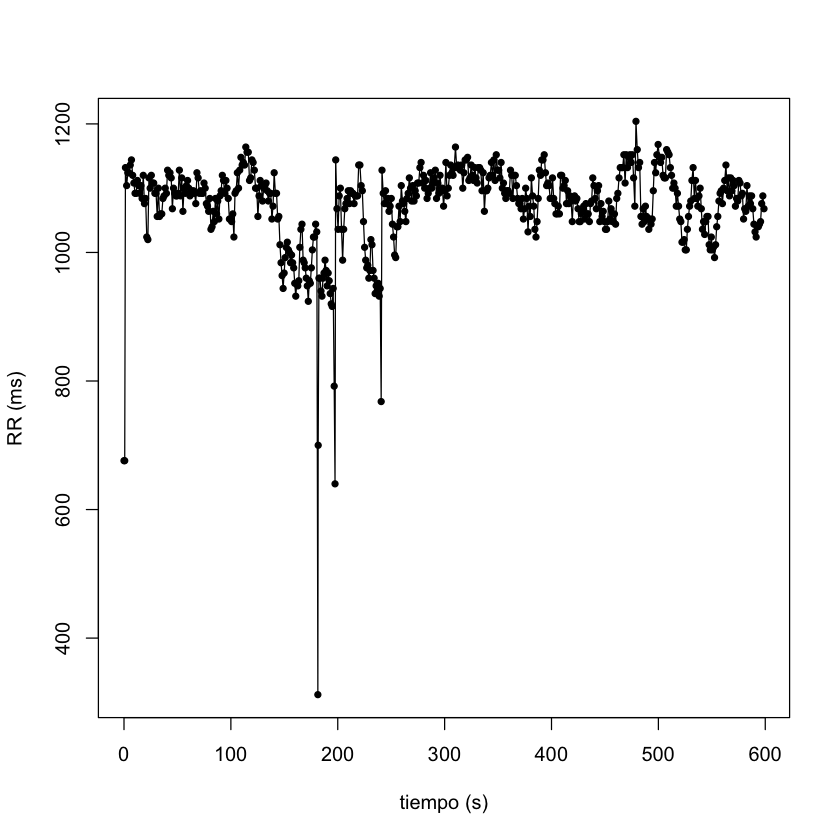

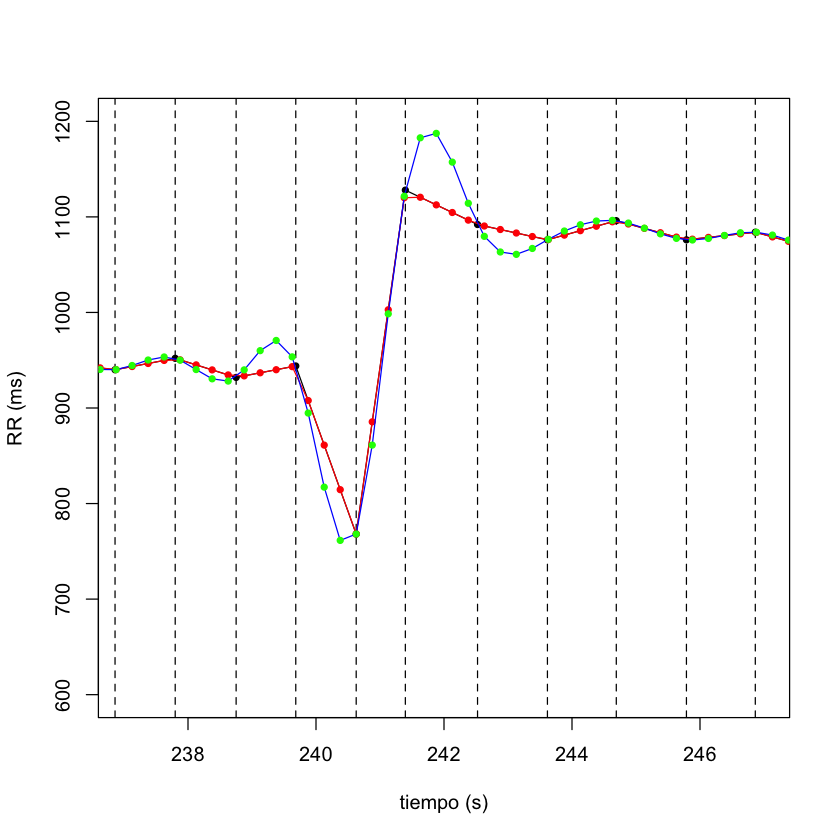

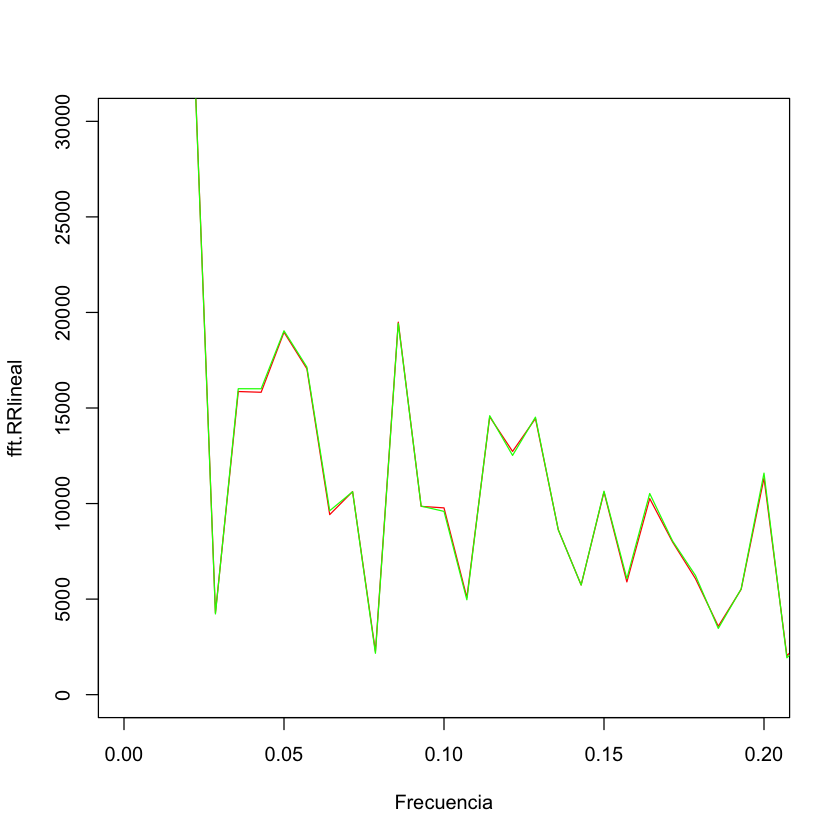

In [16]:
# Caso 3: Muestreo uniforme
dato.rr = read.csv(paste(dir, 'RR.csv', sep=''))
print(names(dato.rr))
# "t" "RR"

plot(dato.rr$t, dato.rr$RR, type='l', ylab='RR (ms)', xlab='tiempo (s)')
points(dato.rr$t, dato.rr$RR, pch=20)

plot(dato.rr$t, dato.rr$RR, type='l', ylab='RR (ms)', xlab='tiempo (s)', xlim=c(237,247), ylim=c(600,1200))
points(dato.rr$t, dato.rr$RR, pch=20)

N = length(dato.rr$t)
for(j in 1:N)
    {
    abline(v=dato.rr$t[j], lty =2)
    }
Nmuestro = as.integer(4*max(dato.rr$t))
RRlineal = approx(dato.rr$t, dato.rr$RR, n=Nmuestro)
RRspline = spline(dato.rr$t ,dato.rr$RR, n=Nmuestro)

lines(RRlineal$x, RRlineal$y, col='red')
points(RRlineal$x, RRlineal$y, pch=20, col='red')
lines(RRspline$x, RRspline$y, col='blue')
points(RRspline$x, RRspline$y, pch=20, col='green')

fft.RRlineal = Mod(fft(RRlineal$y))
fft.RRspline = Mod(fft(RRspline$y))
tiempo = 0:(length(fft.RRlineal)-1)

FrecuenciaMuestreo = 4
DeltaFrecMuestreo = FrecuenciaMuestreo/N
Frecuencia = DeltaFrecMuestreo*tiempo

plot(Frecuencia, fft.RRlineal, type='l', xlim=c(0,0.2), ylim=c(0,30000), col='red')
lines(Frecuencia, fft.RRspline, col='green')

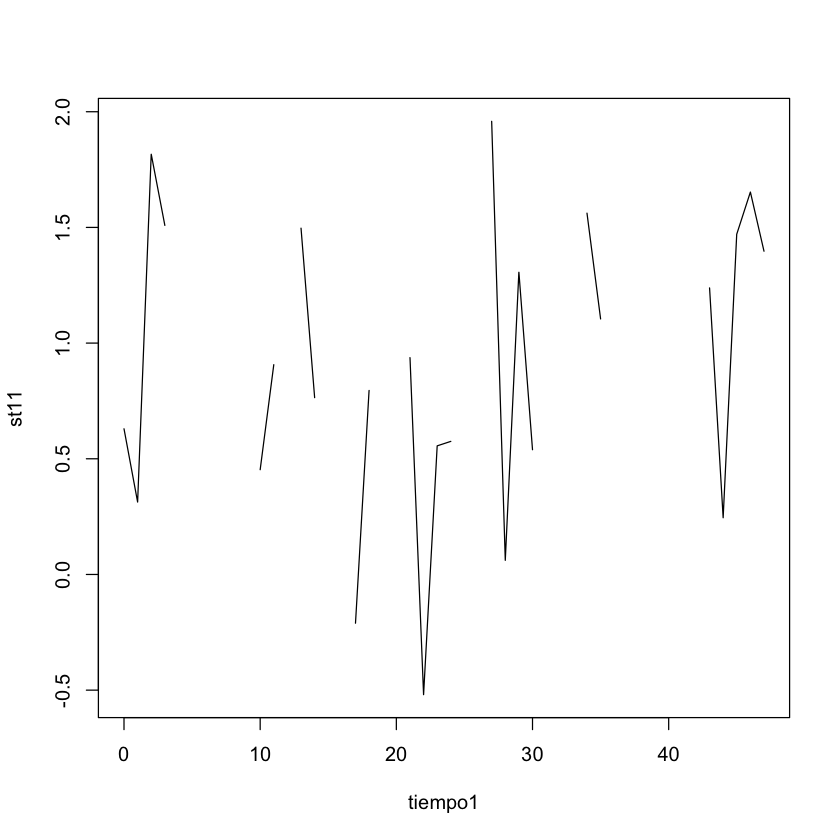

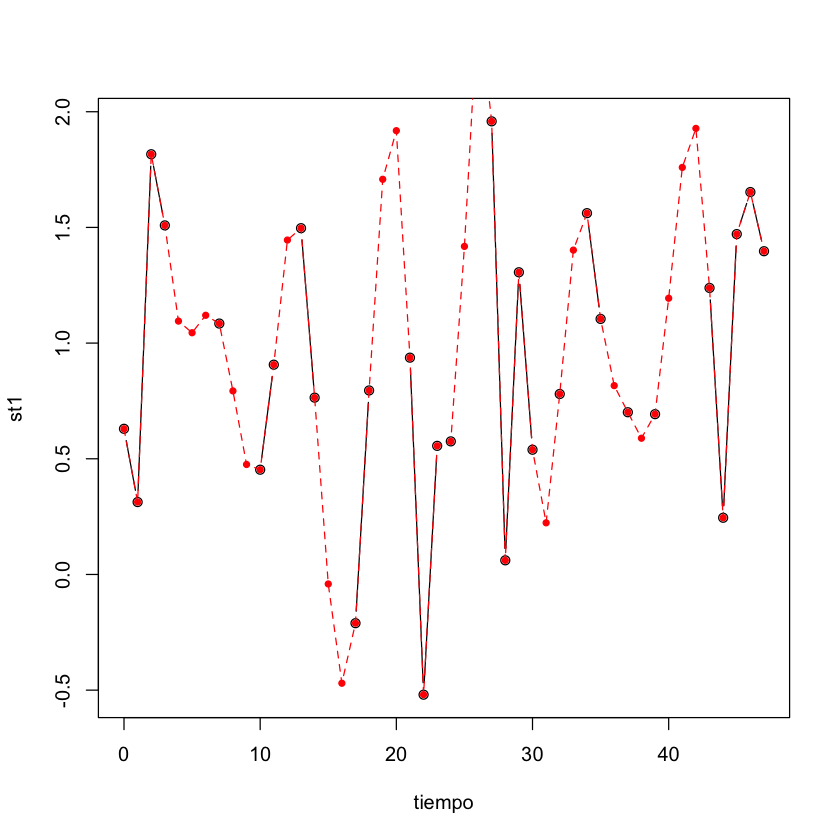

In [21]:
# Caso 4: Muestreo uniforme de una ST con muestras perdidas
#library(muStat)
N = 48
tiempo = 0:(N-1)

st1 = rnorm(N,mean=1, sd=0.5)
indices = runif(25, min=5, max=45)

st1[indices] = NA
st11 = st1[is.numeric(st1)]

tiempo1 = tiempo[is.numeric(st1)]

plot(tiempo1, st11, type='l')
st2 = spline(tiempo1, st11, N)
plot(tiempo, st1, type='b')
lines(st2$x, st2$y, col='red', lty =2)
points(st2$x, st2$y, pch=20, col='red')